## Reading and understanding the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

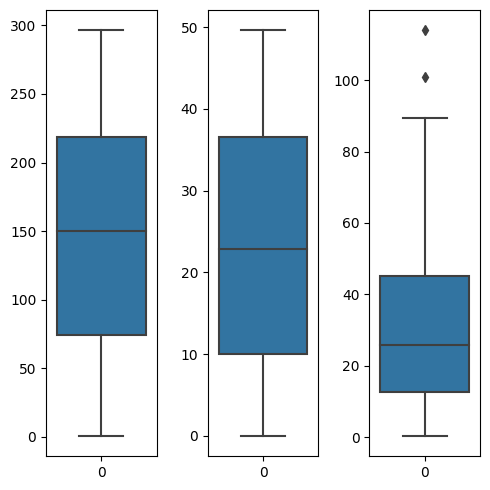

In [7]:
# Outlier Analysis
fig,axs = plt.subplots(1,3, figsize= (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Radio'], ax = axs[1])
plt3 = sns.boxplot(df['Newspaper'], ax = axs[2])
plt.tight_layout()

## EDA

Sales(target)

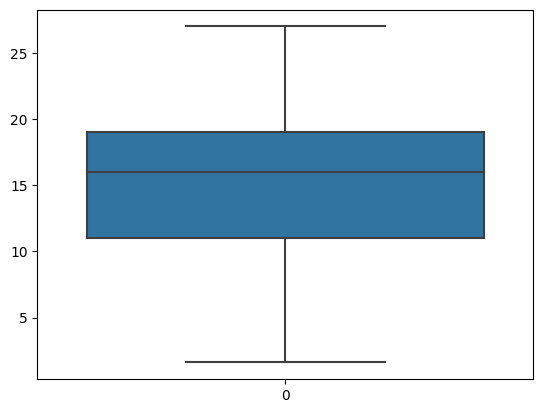

In [8]:
sns.boxplot(df['Sales'])
plt.show()

### **Let's see how Sales are related with other variables using scatter plot.**

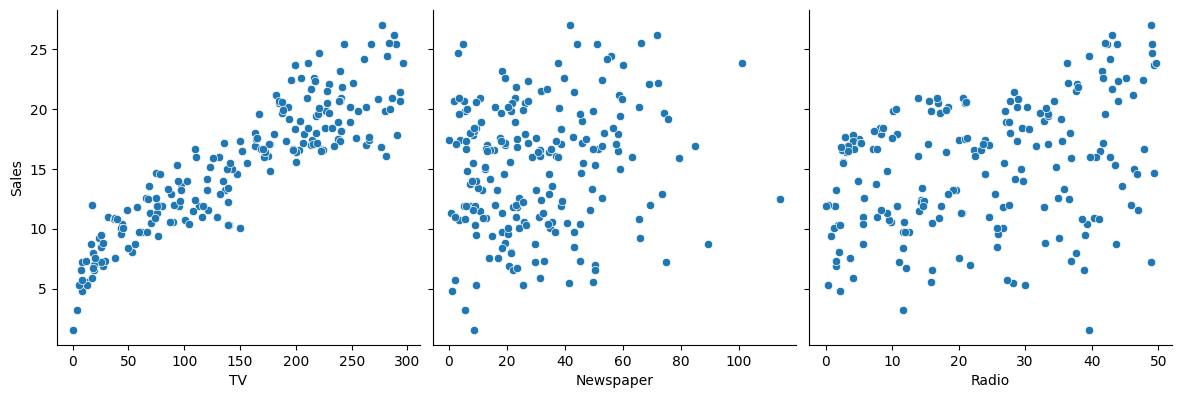

In [9]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'], y_vars= 'Sales', height= 4, aspect= 1, kind= 'scatter') 
plt.show()

### **Let's see the correlation between different variables***

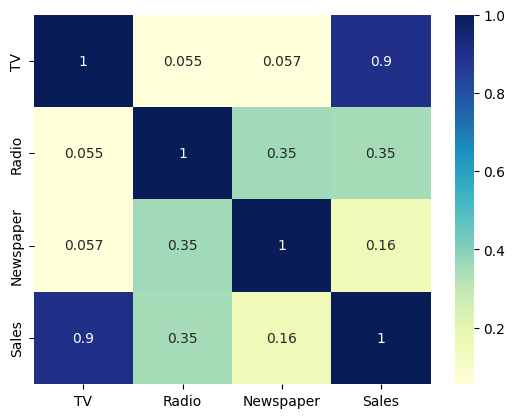

In [10]:
sns.heatmap(df.corr(), cmap= "YlGnBu", annot= True)
plt.show()

**As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.**

## Model Building

In [11]:
x = df['TV'] 
y = df['Sales'] 

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size= 0.7, test_size= 0.3, random_state= 100)


In [13]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [14]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

### Building a Linear Model

In [15]:
import statsmodels.api as sm

In [16]:
# Add a constant to get an intercept 
x_train_sm = sm.add_constant(x_train)

# Fit the regression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

In [17]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [18]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.52e-52
Time:                        19:42:23   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

**Sales= 6.948 + 0.0545*TV**

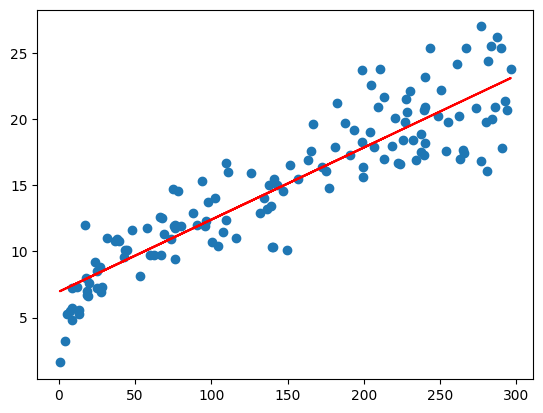

In [19]:
plt.scatter(x_train, y_train)
plt.plot(x_train,6.948 + 0.0545*x_train , 'r')
plt.show()

### Model evaluation 

In [20]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

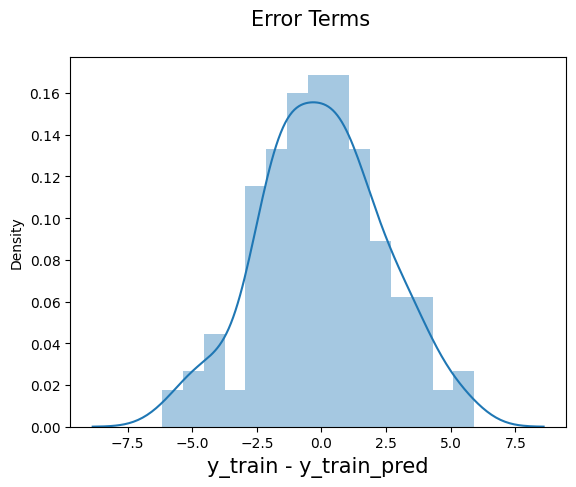

In [21]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

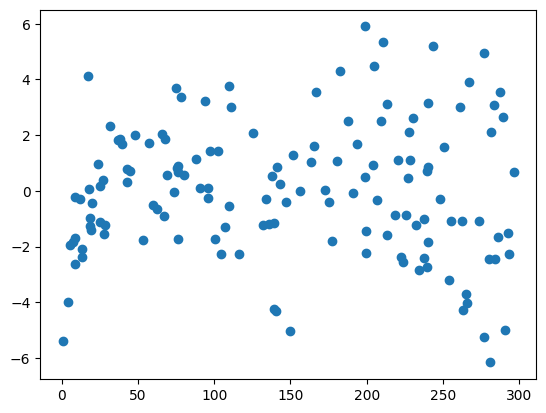

In [22]:
plt.scatter(x_train,res)
plt.show()

In [23]:
x_test_sm = sm.add_constant(x_test)
# predict the y values corresponding to x_test_sm
y_pred = lr.predict(x_test_sm)

In [24]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [27]:
r2 = r2_score(y_test, y_pred)
r2

0.792103160124566

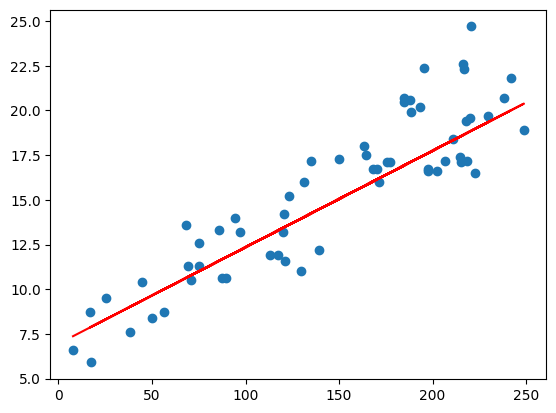

In [28]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()
